# ROC curve exercise

In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from ipywidgets import widgets,interactive
from sklearn.metrics import roc_curve

This section loads the data and plots it

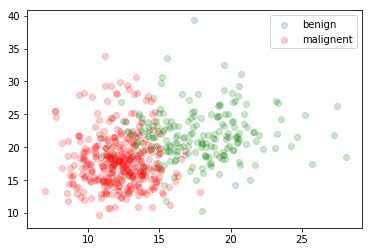

In [2]:
cancer=datasets.load_breast_cancer()
#only take two features
X=cancer.data[:,:2]
y=cancer.target
malignent=cancer.data[y==1]
benign=cancer.data[y==0]
xb,yb=benign[:,0],benign[:,1]
xm,ym=malignent[:,0],malignent[:,1]
plt.scatter(xb,yb,color='g',alpha=0.2,label='benign')
plt.scatter(xm,ym,color='r',alpha=0.2,label='malignent')
plt.legend();

## Task 1

Now we use `sklearn` to train a logistic regression model to classify our data. We will discuss the meaning of `C` in a later lecture. 

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0, solver='lbfgs')
lr.fit(X,y)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
print(lr)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Use the `decision_function` member function of the linear regression model to create four arrays containing the z values correspoinding to true positive, false positive, etc. in the function `getDecisionArrays`. The return values of this function should be four one-dimensional arrays of floats. 

In [5]:
def getDecisionArrays(X, y, model):
    ''' Return tp, fp, tn, fn, four arrays of values of z corresponding to true positive, 
        false positive, and false negative.
    '''
     
    tp = []
    tn = []
    fp = []
    fn = []
    
    y_pred = model.predict(X)
    
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            tp.append(model.decision_function([X[i]])[0])
        elif y[i] == 1 and y_pred[i] == 0:
            fn.append(model.decision_function([X[i]])[0])
        elif y[i] == 0 and y_pred[i] == 1:
            fp.append(model.decision_function([X[i]])[0])
        else:
            tn.append(model.decision_function([X[i]])[0])
            
    # YOUR CODE HERE
    return tp, fp, tn, fn


In [6]:
tp, fp, tn, fn = getDecisionArrays(X, y, lr)
assert len(tp) == 334, 'There should be 334 events which are correctly classified as positive.'
assert np.isclose(tp[:5],np.array([2.403741551788574, 2.5955164324497595, 7.08899451935018, 2.0572141926784724, 7.511859816549476])).all()
assert len(fp) == 39, 'There should be 39 events which are incorrectly classified as positive.'
assert np.isclose(fp[:5],np.array([3.33158079625165, 3.2636661961861755, 0.8126760344878186, 1.3472541433135312, 1.433815447821221])).all()
assert len(tn) == 173
assert np.isclose(tn[:3],np.array([-1.4321272777718903, -5.771474037175768, -5.600356454622837])).all()
assert len(fn) == 23
assert np.isclose(fn[:3],np.array([-0.845141907046763, -0.048752379756617614, -2.19717345542551])).all()

Use the `getDecisionArrays` function, which you defined above, to reproduce the following plot

![](yofz_colors.png)

The definitions of $y$ and $z$ are the same as in the lecture notes.

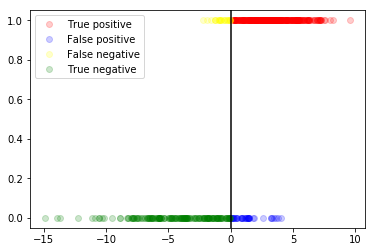

In [28]:
tp, fp, tn, fn = getDecisionArrays(X, y, lr)
plt.plot(tp, np.ones(len(tp)), "o", color = "r", label = "True positive", alpha = 0.2)
plt.plot(fp, np.zeros(len(fp)), "o", color = "blue", label = "False positive", alpha = 0.2)
plt.plot(fn, np.ones(len(fn)), "o", color = "yellow", label = "False negative", alpha = 0.2)
plt.plot(tn, np.zeros(len(tn)), "o", color = "green", label = "True negative", alpha = 0.2)


plt.axvline(0,color='black')
plt.legend()
# YOUR CODE HERE
plt.show()

## Task 2

Create a ROC curve for this logistic regression model.

In [8]:
def getDecisionArraysAsZ(X, y, model, z):
    ''' Return tp, fp, tn, fn, four arrays of values of z corresponding to true positive, 
        false positive, and false negative.
    '''
     
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    y_pred = model.decision_function(X)
    for i in range(len(y_pred)):
        if y_pred[i] > z:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y[i] == 0 and y_pred[i] == 1:
            fp += 1
        else:
            tn += 1
            
    # YOUR CODE HERE
    return tp, fp, tn, fn

Text(0,0.5,'true positive rate')

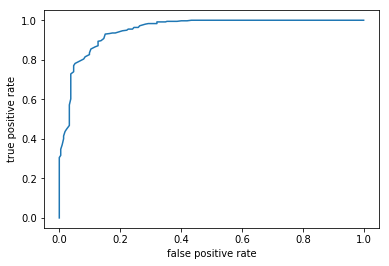

In [9]:
TPR = []
FPR = []
a = np.linspace(-15.0, 10.0, num = 250)
for z in a:
    tp, fp, tn, fn = getDecisionArraysAsZ(X, y, lr, z)
    TPR.append(tp / (tp + fn))
    FPR.append(fp / (fp + tn))
# YOUR CODE HERE
plt.plot(FPR, TPR)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')


## Bonus exercise 1


Now that we did the curve the hard way we can check that we got the right answer using `sklearn` and the `roc_curve` member of the model. Look up the description of `roc_curve` and use it to make another plot of the ROC curve.

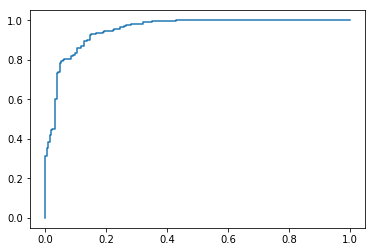

In [14]:
'''Plot your ROC curve using the roc_curve function of sklear here'''
y_pred = lr.decision_function(X)
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr)
# YOUR CODE HERE
plt.show()

## Bonus exercise 2 

Create an interactive plot showing the location on the ROC curve and the plot you coded above with the location of the threshold as an interactive parameter.   

In [29]:

def ROCinteractive(t):
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
    # replace this...
    tp, fp, tn, fn = getDecisionArraysAsZ(X, y, lr, t)
    vs = np.linspace(0,1)
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ax1.plot(FPR,TPR)

    true_positive_rate,false_positive_rate = tpr, fpr
    ax1.plot([false_positive_rate],[true_positive_rate],'or')
    ax1.set_xlabel('false positive rate')
    ax1.set_ylabel('true positive rate')
    
    tp, fp, tn, fn = getDecisionArrays(X, y, lr)
    ax2.axvline(t,color='r')
    plt.plot(tp, np.ones(len(tp)), "o", color = "r", label = "True positive", alpha = 0.2)
    plt.plot(fp, np.zeros(len(fp)), "o", color = "blue", label = "False positive", alpha = 0.2)
    plt.plot(fn, np.ones(len(fn)), "o", color = "yellow", label = "False negative", alpha = 0.2)
    plt.plot(tn, np.zeros(len(tn)), "o", color = "green", label = "True negative", alpha = 0.2)
    ax2.set_xlim((-15,10))
    ax2.set_ylim((-0.1,1.1))

st = widgets.FloatSlider(min = -15, max = 10, value = 0.,continuous_update=False)
i=interactive(ROCinteractive, t = st)
i.layout.height='700px'
display(i);


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=10.0, min=-15.0), O…